# Notebook Content

- Exploring
- Cleaning
- Analysis
- Preprocessing and Piplines
- Model Selection
- Model Tuning
- Predicting Prices

# Importing and Exploring The Dataset

In [1]:
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cat-reloaded-data-science-competition/sample_submission.csv
/kaggle/input/cat-reloaded-data-science-competition/train_dataset.csv
/kaggle/input/cat-reloaded-data-science-competition/test_dataset.csv


In [2]:
import pandas as pd
import numpy as np

train_set = pd.read_csv('/kaggle/input/cat-reloaded-data-science-competition/train_dataset.csv')
test_set = pd.read_csv('/kaggle/input/cat-reloaded-data-science-competition/test_dataset.csv')

print("Train Set Shape : ", train_set.shape)
print("Test Set Shape : ", test_set.shape)

Train Set Shape :  (6823, 9)
Test Set Shape :  (2000, 9)


In [3]:
train = train_set.copy()

In [4]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,Jesse James (Lucky Luke),"Rene Goscinny, Jean Tarbary","Paperback,– Import, 1 Apr 2008",5.0 out of 5 stars,1 customer review,Cowboy Lucky Luke upholds the law of the Wild ...,Comics & Mangas (Books),Comics & Mangas,2.292
1,A Storm of Swords 2: Blood and Gold (A Song of...,George R. R. Martin,"Paperback,– 27 Mar 2014",4.5 out of 5 stars,474 customer reviews,HBO’s hit series A GAME OF THRONES is based on...,Action & Adventure (Books),"Crime, Thriller & Mystery",4.800
2,"Mastering Copperplate Calligraphy (Lettering, ...",Eleanor Winters,"Paperback,– 28 May 2000",4.9 out of 5 stars,15 customer reviews,Developed by English handwriting masters in th...,"Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",10.500
3,I Am Zlatan Ibrahimovic,Zlatan Ibrahimovic,"Paperback,– 24 Sep 2013",4.8 out of 5 stars,52 customer reviews,"I AM ZLATAN - the explosive, critically-acclai...",Biographies & Autobiographies (Books),Sports,5.520
4,Bought For The Billionaire's Revenge (Modern),Connelly Clare,"Paperback,– 28 Jul 2017",4.5 out of 5 stars,2 customer reviews,Sold to the ruthless tycoon!\n\nInnocent socia...,Romance (Books),Romance,4.776


In [5]:
test_set.head()

,ID,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,0,Eeny Meeny: DI Helen Grace 1,M. J. Arlidge,"May 8, 2014",4.2 out of 5 stars,278 customer reviews,*** Start a new crime series... now at this sp...,"Fiction , Thrillers , Suspense",Thrillers
1,1,A Dictionary of Science (Oxford Quick Reference),Jonathan Law,"Paperback,– 23 Mar 2017",4.7 out of 5 stars,21 customer reviews,This bestselling dictionary contains more than...,Astronomy & Astrophysics,"Computing, Internet & Digital Media"
2,2,Influence: The Psychology of Persuasion,"Robert B. Cialdini, PhD","Jun 2, 2009",4.3 out of 5 stars,288 customer reviews,"Influence, the classic book on persuasion, exp...","Business &amp, Economics , Motivational",Motivational
3,3,The Art of Super Mario Odyssey,Nintendo,"Nov 5, 2019",3.9 out of 5 stars,9 customer reviews,Take a globetrotting journey all over the worl...,none,NaN
4,4,Swimming: Swimming Made Easy: Beginner and Exp...,Ace McCloud,"Paperback,– Large Print, Import",4.0 out of 5 stars,1 customer review,Are you tired of being a weak swimmer? Do less...,"Swimming, Snorkelling & Diving (Books)",Sports


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6822 non-null   object 
 1   Author        6822 non-null   object 
 2   Edition       6823 non-null   object 
 3   Reviews       6823 non-null   object 
 4   Ratings       6823 non-null   object 
 5   Synopsis      5808 non-null   object 
 6   Genre         6822 non-null   object 
 7   BookCategory  6419 non-null   object 
 8   Price         6823 non-null   float64
dtypes: float64(1), object(8)
memory usage: 479.9+ KB


In [7]:
train.describe()

,Price
count,6823.000000
mean,13.471419
std,25.174514
min,0.000000
25%,3.588000
50%,5.868000
75%,13.465000
max,886.080000


### Summary

- Column `'Author'` has a lot of spelling errors and wrong names
- Column `'Edition'` can be used to extract the date the book was published on
- Column `'Reviews'` needs to be cleaned and cast to `float` and So does Column `'Reviews'`
- Column `'Genre'` and `'BookCategory'` are very similar and should decide which to keep
- Column `'price'` is very right skewed
- Other Columns won't be very helpful and needs to be dropped


<br></br>
<br></br>
_________________
<br></br>
<br></br>

# Cleaning 
<br></br>

### 1. Column `'Author'`

In [8]:
train['Author'].nunique()

3449

In [9]:
import warnings
warnings.filterwarnings('ignore')

try :
    from fuzzywuzzy import process
    from fuzzywuzzy import fuzz
except:
    !pip install fuzzywuzzy
    from fuzzywuzzy import process
    from fuzzywuzzy import fuzz

from pathlib import Path

In [10]:
def clean_author(X):
    for i in X.columns:
        to_replace = { 'nan' : '',   '\.' : '',   'é': 'e',   '\(': '', '\)' : '',   ';': ',',
                          '-': ',', ' and ' : ',', 'in conversation with' : ',', 'dr': '', 'ms' : '',
                          '/' : ' ', '&' : ' '}

        X[i] = X[i].fillna('').replace(to_replace, regex = True)
        X[i] = X[i].str.lower().str.strip()

        X[i] = X[i].str.split(',').apply(lambda x:x[0])

        not_author_names = ['match', 'j', 'ath', 'match', 'bam', 'bama', 'one', 'charles', 'mau', 'mccarthy',
                                'oup', 'kai','j', 'rees', 'anuja', 'priya', 'oup', 'jean', 'dict', 'giri', 'phd',
                                '0', 0, 'jakeman', 'act', 'val', 'v', 'md phd', 'phd', 'smith', 'levitt', 'rk', 'md phd',
                                'r k', '2', 2, 'z', 'jones', 'dickins', 'willia', 'et al', 'dan', 'kerr', 'khan', 'buday',
                                'paul', 'gordon', 'baud', 'taylor', 'alt', 'jones', 'webster', 'wright', 'yes', 'willia',
                                'paul', 'douglas', 'smith', 'no', 'med', 'rao n', 'russ', 'kerr', 'various','various authors',
                                'singh', 'jan', 'school zone', 'bbc', 'dictionary',
                           ]


        X[i] = X[i].str.strip()
        filt = X[i].isin(not_author_names)
        X[i][filt] = ''

        author_names_typo = ['george rr martin', 'rene goscinny', 'jm barlog', 'ladybird', 'erik larson',
                    'ananth sashikala', 'stieg larsson', 'daniel silva', 'nikhil sharma shantanu gupta', 'steve kaplan',
                    'dk stan lee', 'ripley', 'william jr strunk', 'becky chambers', 'trinity college london', 'scholastic',
                    'thich nhat hanh', 'jim collins', 'dan simmons', 'golding william', 'ray bradbury', 'sc gupta', 'tom taylor',
                    'richard williams', 'william h mcraven', 'schwarzenegger', 'tilly bagshawe sidney sheldon', 'rajiv vijayakar',
                    'daniel coyle', 'jk rowling', 'melville herman', 'jd salinger', 'jim collins', 'jrr tolkien', 'krissy moehl',
                    'yashavant kanetkar' , 'conan doyle', 'yuval harari', 'datta durjoy','micheal crichton', 'suzanne collins',
                    'jhimli mukherjee pandey', 'sc gupta', 'titan books', 'princeton review', 'ramachandra guha', 'rp sinha',
                    'shashi tharoor', 'terry obrien', 'arthur co doyle', 'brene brown', 'kohei horikoshi', 'sarnath banerjee',
                    'rk laxman', 'shivaprasad koirala', 'noam choky', 'marie kondo', 'hg wells', 'hg wells', 'marie kondō',
                    'ursula le guin', 'myatt murphy', 'patrick thorpe', 'samah visaria','cormac mccarthy', 'mark collin',
                    'paramahansa yogananda', 'marie kondo', 'rk laxman', 'kohei horikoshi', 'sujata massey', 'banerjee sarnath',
                    'oxford', 'shivprasad koirala', 'david lynch', 'richard branson', 've schwab', 'noam choky', 'cambridge esol',
                    'michael swan', 'hg wells', 'sudeep nagarkar', 'lance artrong', 'fyodor dostoevsky', 'lin lougheed', 'upenan s',
                    'marie kondo', 'patrick thorpe', 'myatt murphy', 'upenan s', 'richard branson', 'zhi gang sha', 'scott lynch',
                    'nagarkar sudeep', 'willard palmer', 'stuart sim', 'massey sujata', 'molly suber thorpe', 'heather mascie',
                    's chakraborty', 'stephen colbert', 've schwab', 'willard palmer', 'michael j casey', 'lin lougheed',
                    'mizuma lenin', 'mark collin', 'michael j casey', 'jorge borges', 'lance artrong', 'itl esl', 'jorge borges',
                    'andre aciman', 'trinity college london', 'bill watterson', 'om books editorial team', 'clive cussler',
                    'jim corbett', 'apj abdul kalam',  'stephen king', 'peter mayle', 'el james',]

        for name in author_names_typo:
            for p in process.extract(name, X[i].unique(), limit = len(X[i].unique())):
                if  (90 <= p[1]  < 100) and (p[0] != ''):
                    filt = (X[i] == p[0])
                    X[i][filt] = name
   
    return X.replace('', np.nan)
   


In [11]:
train[['Author']] = clean_author(train[['Author']])
train[['Author']].head()

,Author
0,rene goscinny
1,george rr martin
2,eleanor winters
3,zlatan ibrahimovic
4,connelly clare


In [12]:
train['Author'].nunique()

3282

In [13]:
n_of_books_per_author = train['Author'].value_counts().sort_values(ascending = False)
n_of_books_per_author.head()

agatha christie     76
george rr martin    48
dk stan lee         45
ladybird            42
john grisham        42
Name: Author, dtype: int64

In [14]:
n_of_books_per_author.tail()

siddhartha mukherjee    1
susan hill              1
charles krauthammer     1
penelope bagieu         1
michael miller          1
Name: Author, dtype: int64

In [15]:
filt = (n_of_books_per_author == 1)
filt1 = (n_of_books_per_author == 2)
filt2 = (n_of_books_per_author > 2)
print('Number of Writers wrote only one book is ', filt.sum())
print('Number of Writers wrote only two books is', filt1.sum())
print('Number of Writers wrote more than two books is', filt2.sum())

Number of Writers wrote only one book is  2307
Number of Writers wrote only two books is 440
Number of Writers wrote more than two books is 535


In [16]:
def map_freq(X):
    for i in X.columns:
        X[i] = X[i].map(X[i].value_counts())
    return X

In [17]:
train[['Number_of_Books']] = map_freq(train[['Author']])
train[['Number_of_Books']].head()

,Number_of_Books
0,10.0
1,48.0
2,2.0
3,2.0
4,1.0


### Summary 
- First I removed wrong values from the column which aren't author' names
- Then I fixed spelling errors using `FuzzyWuzzy`
- However, the number of unique values is still significantly high which'd be very hard for a ML model to handle
- So, I thought about mapping each author's name to its frequency "the number of book they wrote" and created new column `'Number_of_Books'`
- Another idea is to group all authors into three categories
    - authors who wrote only one book
    - authors who wrote only two books
    - authors who wrote more than two books
    
<br></br>
### Column `'Edition'`

In [18]:
train['Edition'].sample(5)

758     Paperback,– 14 Mar 1994
4920           Hardcover,- 2021
639                Oct 20, 2017
5858    Paperback,– 21 Oct 2016
326            Paperback,- 2010
Name: Edition, dtype: object

In [19]:
def get_cat(string):
    string = string.split(',')[0]
    if 'paperback' in string.lower():
        return 'paperback'
    elif 'hardcover' in string.lower():
        return 'hardcover'
    else :
        return np.nan
    
    
    
def apply_get_cat(X):
    for i in X.columns:
        X[i] = X[i].apply(get_cat)
    return X

In [20]:
train[['Book_Type']] = apply_get_cat(train_set[['Edition']])

In [21]:
def clean_ed_full_data(X):
    for  i in  X.columns:
        to_remove = {'paperback' : ' ', 'unabridged' : ' ',
             'french' : ' ', 'box set' : ' ', 'kannada' : ' ',
              'abridged  audiobook  box' : ' ', 'spiral bound' : ' ',
              'large print' : ' ', 'deckle edge' : ' ', 'facsimile' : ' ',
              'import' : ' ', 'international edition' : ' ',
              ',' : ' ', 'student edition' : ' ', 'illustrated' : ' ',
              '-' : ' ', 'board book' : ' ', 'mass market' : ' ',
              '–' : ' ', 'deluxe edition' : ' ', 'flexibound' : ' ', '\)' : '',
              'hardcover' : ' ', 'special edition' : ' ' , 'sheet music' : ' ', '\(' : '', 'audiobook' : ' '
        }
        X[i]  = X[i].str.lower().replace(to_remove, regex = True).str.strip()
        X[i] = pd.to_datetime(X[i], errors = 'coerce')
        #X[i] = X[i].dt.year 
        X = pd.concat([X[i].dt.day, X[i].dt.month, X[i].dt.year], axis = 1)
        
    return X


In [22]:
Ed = clean_ed_full_data(train[['Edition']])

train['Day'] = Ed.iloc[ : , 0]
train['Month'] = Ed.iloc[ : , 1]
train['Year'] = Ed.iloc[ : , 2]

train[['Day', 'Month', 'Year']].head()

,Day,Month,Year
0,1.0,4.0,2008.0
1,27.0,3.0,2014.0
2,28.0,5.0,2000.0
3,24.0,9.0,2013.0
4,28.0,7.0,2017.0


### Summary 
- I used the column `'Edition'` to extrat the full day the book was published
<br> </br>

### Column `'Reviews'` and `'Ratings'`

In [23]:
def clean_col(X):
    for i in X.columns:
        if X[i].dtype == 'float64':
            continue;
        X[i] = X[i].apply(lambda x : x.split(' ')[0])
        X[i] = pd.to_numeric(X[i], errors = 'coerce')
    return X

In [24]:
train[['Reviews']] = clean_col(train[['Reviews']])
train['Reviews'].head()

0    5.0
1    4.5
2    4.9
3    4.8
4    4.5
Name: Reviews, dtype: float64

In [25]:
train[['Ratings']] = clean_col(train[['Ratings']])
train[['Ratings']].head()

,Ratings
0,1.0
1,474.0
2,15.0
3,52.0
4,2.0


### Summary 
- I extraxted the review\rating from the columns and casted it to float



- Clean Columns `'Genre'` and `'BookCategory'`

In [26]:
def clean_cat(X):
    for i in X.columns:
        to_remove =  {'\(Books\)' : ' ', '\(single author\)' : ' ', '&' : ',', 'None' : '',  'none' : ''}

        X[i] = X[i].replace(to_remove , regex = True)
        X[i] = X[i].str.strip().str.lower()
        X[i] = X[i].fillna('').str.split(',').apply(lambda a: a[0])
        X[i] = X[i].str.strip()
    
    return X.replace('', np.nan)

In [27]:
train[['Genre']] = clean_cat(train[['Genre']])

print(train[['Genre']].nunique())
train[['Genre']].head()

Genre    338
dtype: int64


,Genre
0,comics
1,action
2,handicrafts
3,biographies
4,romance


In [28]:
train[['BookCategory']] = clean_cat(train[['BookCategory']])

print(train[['BookCategory']].nunique())
train[['BookCategory']].head()

BookCategory    142
dtype: int64


,BookCategory
0,comics
1,crime
2,arts
3,sports
4,romance


### Delete irrelevant columns

In [29]:
train.drop(['Title', 'Edition', 'Synopsis'], axis = 1, inplace = True)

### Handling Missing Values

In [30]:
nans = train.isna().sum().sort_values(ascending = False)
pct = (nans/train.shape[0]) * 100
pd.concat([nans, pct], axis = 1).rename(columns = {0 : 'NullValuesCount', 1 : 'NullValuesPercentage'})

,NullValuesCount,NullValuesPercentage
Book_Type,1117,16.371098
Genre,404,5.921149
BookCategory,404,5.921149
Ratings,191,2.799355
Reviews,61,0.894035
Author,60,0.879379
Number_of_Books,60,0.879379
Day,49,0.718159
Month,49,0.718159
Year,49,0.718159


In [31]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

num_imputer = KNNImputer(n_neighbors= 6)
cat_imputer = SimpleImputer(strategy= 'constant', fill_value= 'missing')

In [32]:
X_cat = train.drop(['Price'], axis = 1).select_dtypes(object)
X_cat.head()

,Author,Genre,BookCategory,Book_Type
0,rene goscinny,comics,comics,paperback
1,george rr martin,action,crime,paperback
2,eleanor winters,handicrafts,arts,paperback
3,zlatan ibrahimovic,biographies,sports,paperback
4,connelly clare,romance,romance,paperback


In [33]:
cat_cols = X_cat.columns.values
X_cat = cat_imputer.fit_transform(X_cat)
X_cat

array([['rene goscinny', 'comics', 'comics', 'paperback'],
       ['george rr martin', 'action', 'crime', 'paperback'],
       ['eleanor winters', 'handicrafts', 'arts', 'paperback'],
       ...,
       ['bose subhas chana', 'linguistics', 'language', 'paperback'],
       ['michael miller', 'writing guides', 'humour', 'paperback'],
       ['jandy nelson', 'romance', 'romance', 'paperback']], dtype=object)

In [34]:
train[cat_cols] = X_cat
print('Num of Missing Values : ', train[cat_cols].isna().sum().sum())
train[cat_cols].head()

Num of Missing Values :  0


,Author,Genre,BookCategory,Book_Type
0,rene goscinny,comics,comics,paperback
1,george rr martin,action,crime,paperback
2,eleanor winters,handicrafts,arts,paperback
3,zlatan ibrahimovic,biographies,sports,paperback
4,connelly clare,romance,romance,paperback


In [35]:
X_num = train.drop(['Price'], axis = 1).select_dtypes(np.number)
X_num.head()

,Reviews,Ratings,Number_of_Books,Day,Month,Year
0,5.0,1.0,10.0,1.0,4.0,2008.0
1,4.5,474.0,48.0,27.0,3.0,2014.0
2,4.9,15.0,2.0,28.0,5.0,2000.0
3,4.8,52.0,2.0,24.0,9.0,2013.0
4,4.5,2.0,1.0,28.0,7.0,2017.0


In [36]:
num_cols = X_num.columns.values
X_num = num_imputer.fit_transform(X_num)
X_num.round(2)

array([[5.000e+00, 1.000e+00, 1.000e+01, 1.000e+00, 4.000e+00, 2.008e+03],
       [4.500e+00, 4.740e+02, 4.800e+01, 2.700e+01, 3.000e+00, 2.014e+03],
       [4.900e+00, 1.500e+01, 2.000e+00, 2.800e+01, 5.000e+00, 2.000e+03],
       ...,
       [4.500e+00, 1.600e+01, 2.000e+00, 1.000e+00, 6.000e+00, 1.997e+03],
       [5.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+01, 2.005e+03],
       [4.700e+00, 7.000e+01, 2.000e+00, 1.000e+00, 4.000e+00, 2.015e+03]])

In [37]:
train[num_cols] = X_num
print('Num of Missing Values : ', train[num_cols].isna().sum().sum())
train[num_cols].head()

Num of Missing Values :  0


,Reviews,Ratings,Number_of_Books,Day,Month,Year
0,5.0,1.0,10.0,1.0,4.0,2008.0
1,4.5,474.0,48.0,27.0,3.0,2014.0
2,4.9,15.0,2.0,28.0,5.0,2000.0
3,4.8,52.0,2.0,24.0,9.0,2013.0
4,4.5,2.0,1.0,28.0,7.0,2017.0


In [38]:
train = train[['Author', 'Genre', 'BookCategory', 'Book_Type', 'Number_of_Books', 'Day', 'Month', 'Year', 'Reviews', 'Ratings', 'Price']]
train.rename(columns = {'Ratings' : 'Number_of_Reviews'}, inplace = True)
train.head()

,Author,Genre,BookCategory,Book_Type,Number_of_Books,Day,Month,Year,Reviews,Number_of_Reviews,Price
0,rene goscinny,comics,comics,paperback,10.0,1.0,4.0,2008.0,5.0,1.0,2.292
1,george rr martin,action,crime,paperback,48.0,27.0,3.0,2014.0,4.5,474.0,4.800
2,eleanor winters,handicrafts,arts,paperback,2.0,28.0,5.0,2000.0,4.9,15.0,10.500
3,zlatan ibrahimovic,biographies,sports,paperback,2.0,24.0,9.0,2013.0,4.8,52.0,5.520
4,connelly clare,romance,romance,paperback,1.0,28.0,7.0,2017.0,4.5,2.0,4.776


# Analysis


### Price

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

14.661399336844854


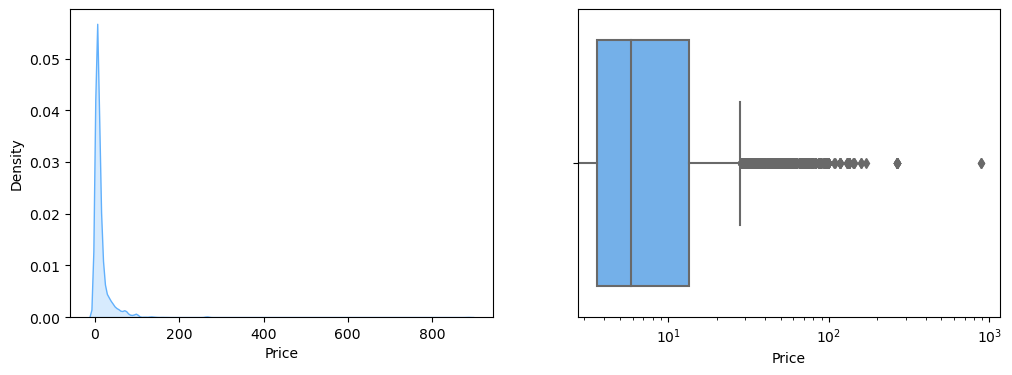

In [40]:
fig, ax = plt.subplots(1, 2, figsize= (12, 4))

print(train['Price'].skew())
sns.kdeplot(x = train['Price'], fill = True, ax = ax[0], color = '#61B0FC')
sns.boxplot(x = train['Price'], ax = ax[1], color = '#61B0FC')

ax[1].set(xscale = 'log')
plt.show()

**The price distribution is heavily right-skewed**

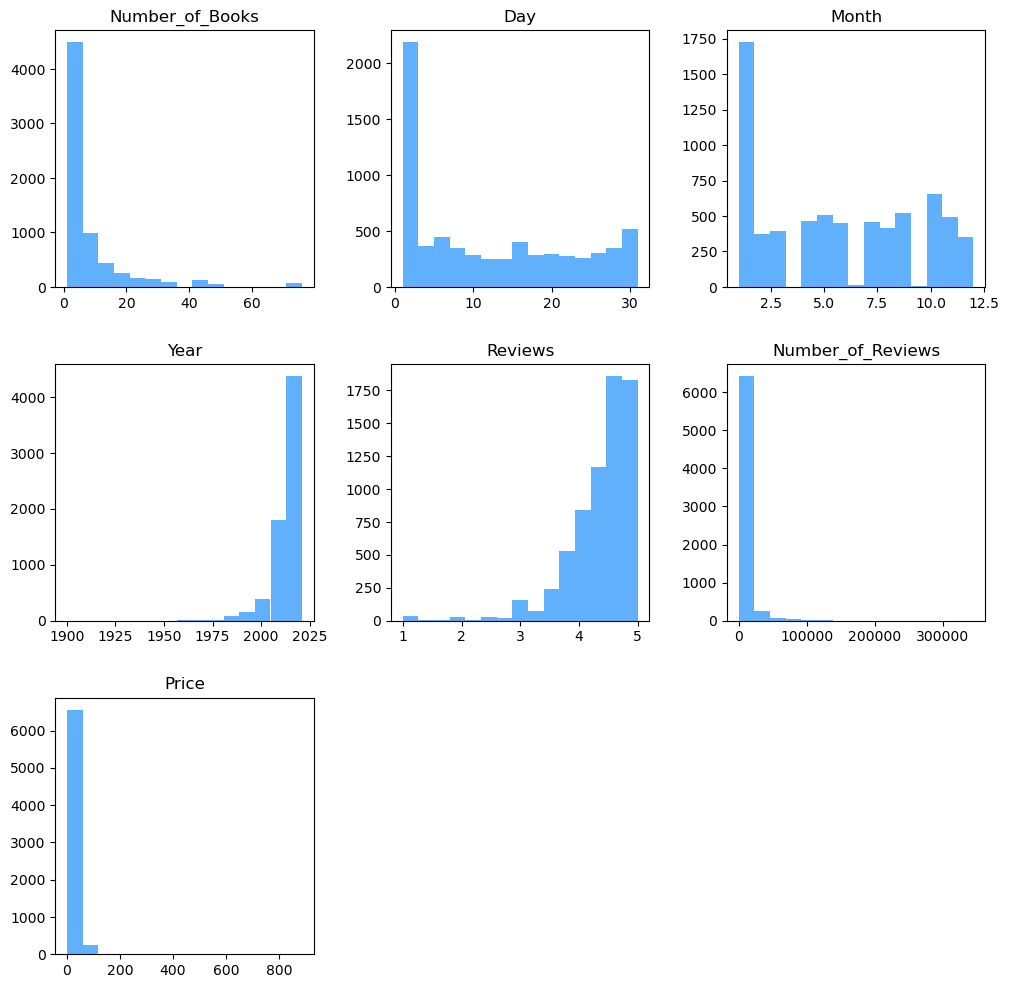

In [41]:
train.hist(figsize = (12,  12), bins = 15, color = '#61B0FC', grid = False)

plt.show()

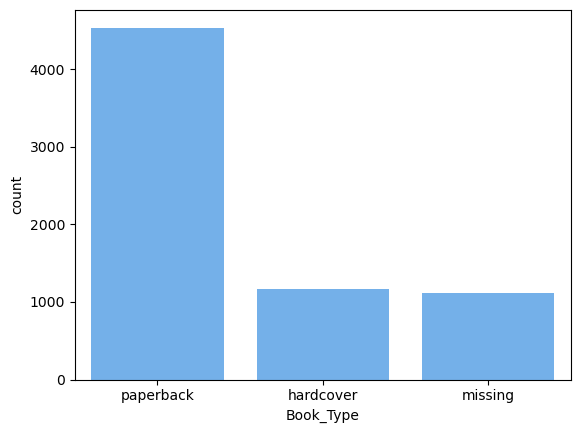

In [42]:
sns.countplot(x = 'Book_Type', data = train, color = '#61B0FC')

plt.show()

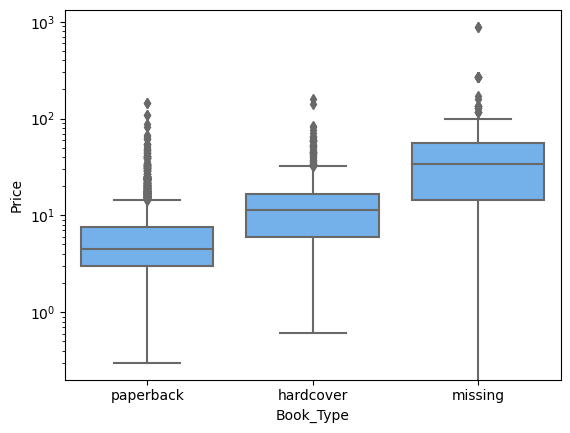

In [43]:
sns.boxplot(x = 'Book_Type', y = 'Price', data = train, color = '#61B0FC')


plt.yscale('log')
plt.show()

In [44]:
names = train['Author'].replace('', np.nan).value_counts().head(10).index.values
names

array(['agatha christie', 'missing', 'george rr martin', 'dk stan lee',
       'john grisham', 'ladybird', 'clive cussler', 'stephen king',
       'brian tracy', 'tilly bagshawe sidney sheldon'], dtype=object)

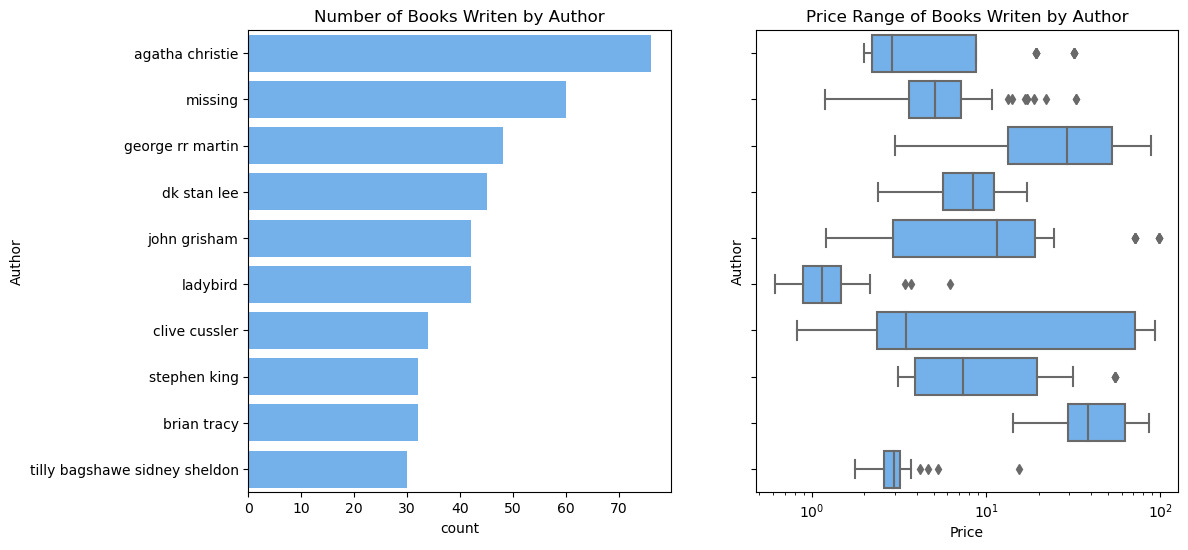

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)
sns.boxplot(y = 'Author', x = 'Price', data = train,
                order = names,  ax = ax[1], color = '#61B0FC')
ax[0].set_title('Number of Books Writen by Author')
sns.countplot(y = 'Author', data = train,
                  order = names, ax = ax[0], color = '#61B0FC')
ax[1].set_title('Price Range of Books Writen by Author')
plt.xscale('log')
 
plt.show()

In [46]:
names = train['BookCategory'].replace('missing', np.nan).value_counts().head(10).index.values
names

array(['action', 'crime', 'non fiction', 'fiction', 'comics',
       'biographies', 'language', 'romance', 'humour', 'arts'],
      dtype=object)

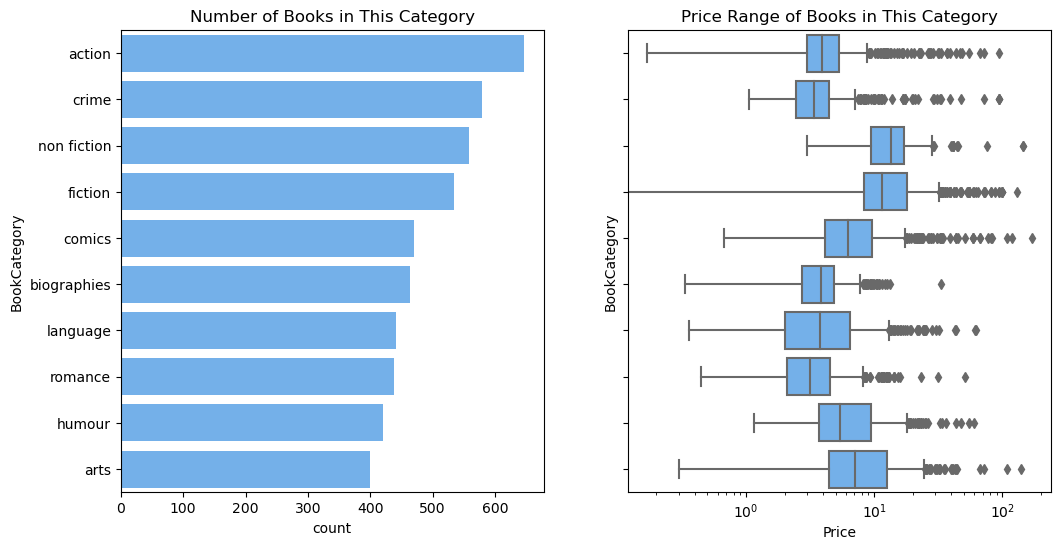

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)
sns.boxplot(y = 'BookCategory', x = 'Price', data = train,
                order = names,  ax = ax[1], color = '#61B0FC')
ax[0].set_title('Number of Books in This Category')
sns.countplot(y = 'BookCategory', data = train,
                  order = names, ax = ax[0], color = '#61B0FC')
ax[1].set_title('Price Range of Books in This Category')
plt.xscale('log')
 
plt.show()

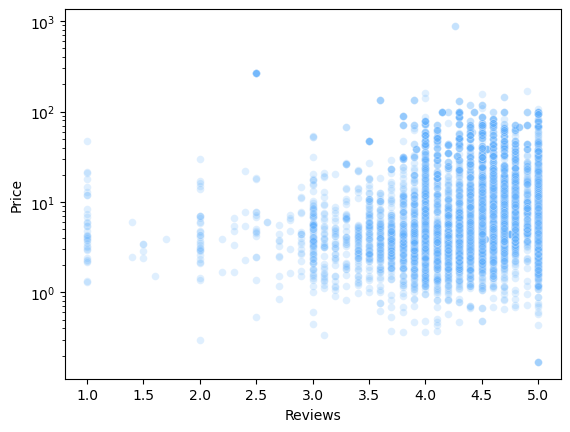

In [48]:
sns.scatterplot(y = 'Price', x = 'Reviews',
                data = train, s = 30, alpha = 0.2, color = '#61B0FC')

plt.yscale('log')

plt.show()

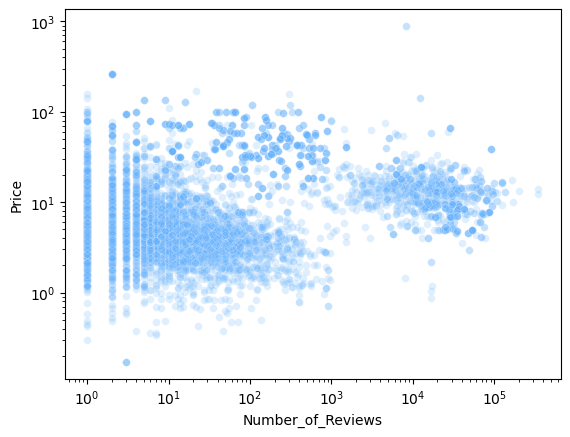

In [49]:
sns.scatterplot(y = 'Price', x = 'Number_of_Reviews',
                data = train, s = 30, alpha = 0.2, color = '#61B0FC')

plt.xscale('log')
plt.yscale('log')

plt.show()

<br></br>
<br></br>
_________________
<br></br>
<br></br>

# Preprocessing and Pipelines

<br> </br>
### Trying Different Transformations

In [50]:
from sklearn.preprocessing import power_transform

def plot_transform(col):
    fig, ax = plt.subplots(1,  4, figsize = (16, 3))
    sns.kdeplot(col, fill = True, ax =ax[0])
    ax[0].set_title(col.columns[0])
    
    sns.kdeplot(np.log(col), fill = True, ax =ax[1])
    ax[1].set_title(f'{col.columns[0]} log transform')
    
    sns.kdeplot(np.sqrt(col), fill = True, ax =ax[2])
    ax[2].set_title(f'{col.columns[0]} square root transform')

    sns.kdeplot(power_transform(col, method= 'box-cox' ), fill = True, ax =ax[3])
    ax[3].set_title(f'{col.columns[0]} box-cox transform')

    plt.show()


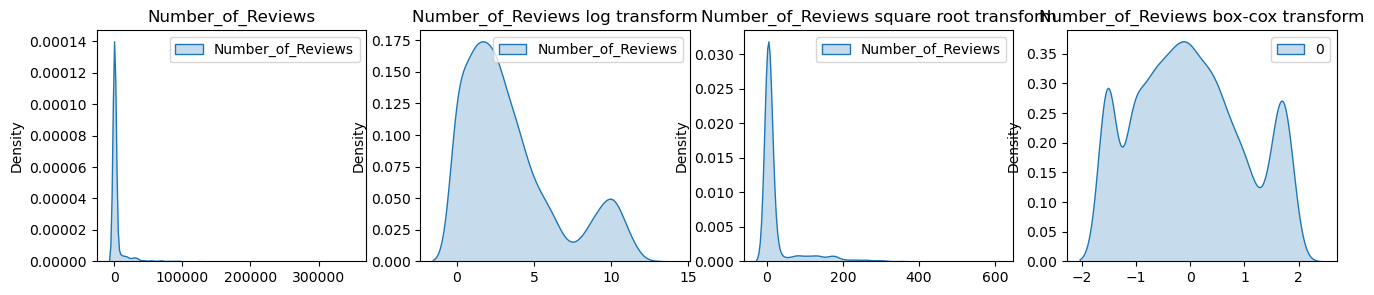

In [51]:
plot_transform(train[['Number_of_Reviews']])

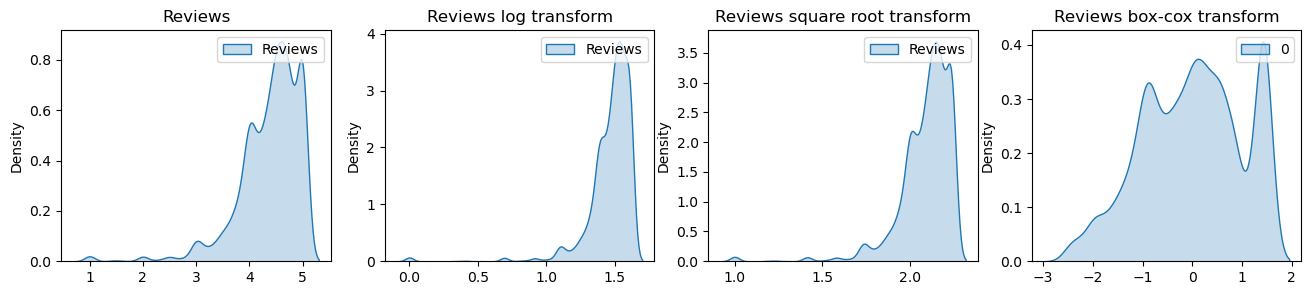

In [52]:
plot_transform(train[['Reviews']])

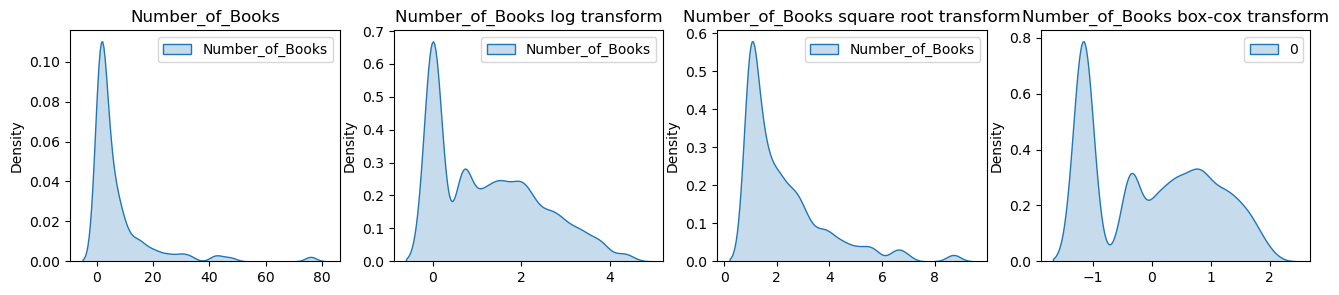

In [53]:
plot_transform(train[['Number_of_Books']])

train[['Number_of_Books']] = power_transform(train[['Number_of_Books']], method= 'box-cox')

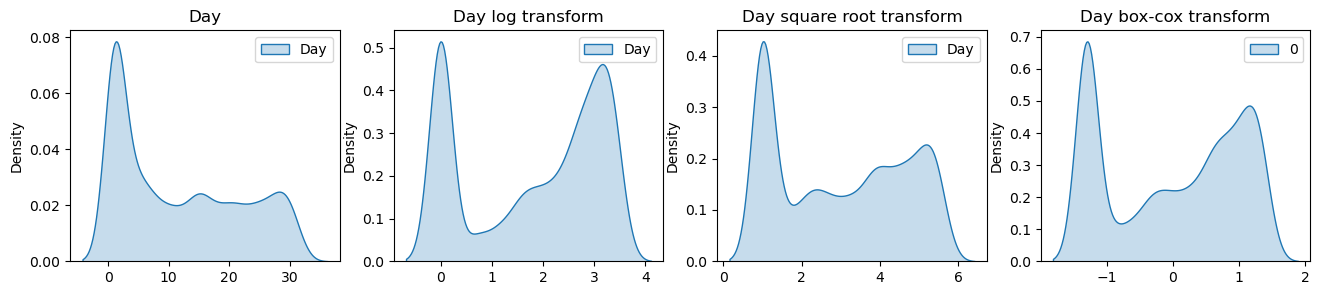

In [54]:
plot_transform(train[['Day']])

train[['Day']] = power_transform(train[['Day']], method= 'box-cox')

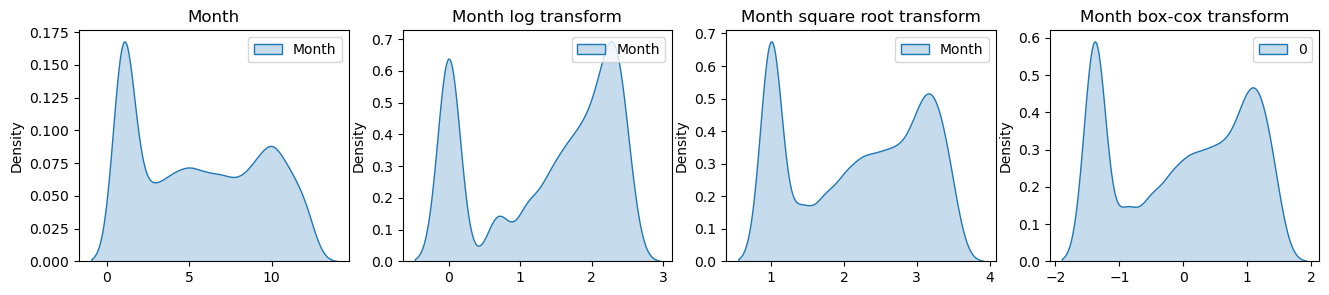

In [55]:
plot_transform(train[['Month']])

train[['Month']] = power_transform(train[['Month']], method= 'box-cox')

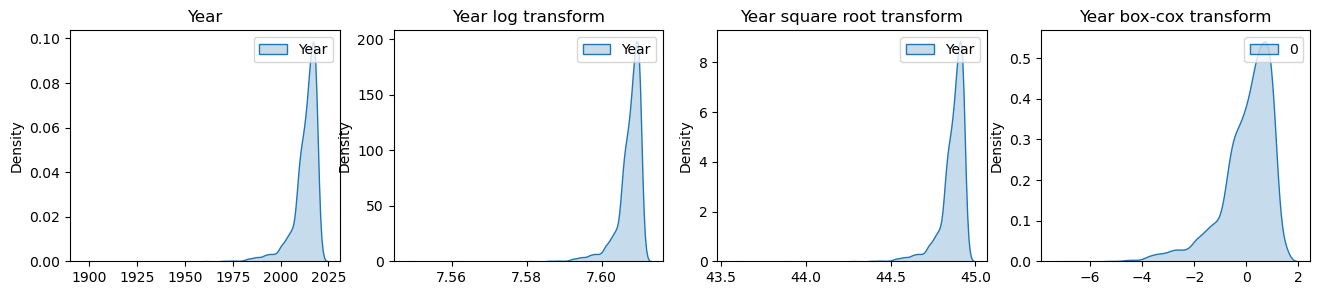

In [56]:
plot_transform(train[['Year']])

train[['Year']] = power_transform(train[['Year']], method= 'box-cox')

### Making Pipelines

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# 'author' pipeline
author_pipline = Pipeline([('clean', FunctionTransformer(clean_author)),
                           
                           ('map', FunctionTransformer(map_freq)), ])


cleaning_pipline = ColumnTransformer([('clean_rate', FunctionTransformer(clean_col), ['Reviews', 'Ratings']),
                                      #('map_aut', author_pipline, ['Author']),
                                      ('get_date', FunctionTransformer(clean_ed_full_data), ['Edition']),
    
                                     ], remainder= 'drop')
cleaning_pipline

ColumnTransformer(transformers=[('clean_rate',
                                 FunctionTransformer(func=<function clean_col at 0x7a0ef431bac0>),
                                 ['Reviews', 'Ratings']),
                                ('get_date',
                                 FunctionTransformer(func=<function clean_ed_full_data at 0x7a0ef43193f0>),
                                 ['Edition'])])

In [58]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform


num_pipline = Pipeline([('clean', cleaning_pipline),
                        ('impute', KNNImputer(n_neighbors=6)),
                        ('pow', FunctionTransformer(power_transform, kw_args= dict(method = 'box-cox'))),
                        ('scale', StandardScaler())])
num_pipline

Pipeline(steps=[('clean',
                 ColumnTransformer(transformers=[('clean_rate',
                                                  FunctionTransformer(func=<function clean_col at 0x7a0ef431bac0>),
                                                  ['Reviews', 'Ratings']),
                                                 ('get_date',
                                                  FunctionTransformer(func=<function clean_ed_full_data at 0x7a0ef43193f0>),
                                                  ['Edition'])])),
                ('impute', KNNImputer(n_neighbors=6)),
                ('pow',
                 FunctionTransformer(func=<function power_transform at 0x7a0ee34de3b0>,
                                     kw_args={'method': 'box-cox'})),
                ('scale', StandardScaler())])

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# bookCategory' pipleine
cat_cleaning = ColumnTransformer([('bookcat', FunctionTransformer(clean_cat), ['BookCategory']),
                                  ('ed', FunctionTransformer(apply_get_cat), ['Edition'])], remainder= 'drop')
cat_pipline = Pipeline([('clean', cat_cleaning),
                        ('impute', SimpleImputer(strategy= 'constant', fill_value = 'missing')),
                        ('encode', OneHotEncoder(handle_unknown = 'ignore'))])

cat_pipline

Pipeline(steps=[('clean',
                 ColumnTransformer(transformers=[('bookcat',
                                                  FunctionTransformer(func=<function clean_cat at 0x7a0ef4319240>),
                                                  ['BookCategory']),
                                                 ('ed',
                                                  FunctionTransformer(func=<function apply_get_cat at 0x7a0ef4319090>),
                                                  ['Edition'])])),
                ('impute',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encode', OneHotEncoder(handle_unknown='ignore'))])

In [60]:
num_attris = ['Edition', 'Reviews', 'Ratings']
cat_attris = ['Edition', 'BookCategory']


full_processing = ColumnTransformer([('num', num_pipline, num_attris),
                                 ('cat', cat_pipline, cat_attris)], remainder= 'drop')
full_processing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('clean',
                                                  ColumnTransformer(transformers=[('clean_rate',
                                                                                   FunctionTransformer(func=<function clean_col at 0x7a0ef431bac0>),
                                                                                   ['Reviews',
                                                                                    'Ratings']),
                                                                                  ('get_date',
                                                                                   FunctionTransformer(func=<function clean_ed_full_data at 0x7a0ef43193f0>),
                                                                                   ['Edition'])])),
                                                 ('impute',
                                                  KNNImputer(n_neighbors=6)),
                                                 ('pow',
                                                  FunctionTran...
                                                  ColumnTransformer(transformers=[('bookcat',
                                                                                   FunctionTransformer(func=<function clean_cat at 0x7a0ef4319240>),
                                                                                   ['BookCategory']),
                                                                                  ('ed',
                                                                                   FunctionTransformer(func=<function apply_get_cat at 0x7a0ef4319090>),
                                                                                   ['Edition'])])),
                                                 ('impute',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Edition', 'BookCategory'])])

In [61]:
X = full_processing.fit_transform(train_set)
X

<6823x151 sparse matrix of type '<class 'numpy.float64'>'
	with 47761 stored elements in Compressed Sparse Row format>

In [62]:
y = train['Price']
y = y.values.reshape(-1, 1)

<br></br>
<br></br>
_________________
<br></br>
<br></br>

# Model Selection

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

reg = RandomForestRegressor(random_state=42)
reg.fit(X, y)

hx = reg.predict(X)
hx

array([ 4.2185076,  5.1525012, 14.87832  , ...,  4.9230576, 13.7347656,
        4.6261656])

In [64]:
rf_error = mean_absolute_error(hx, y)
rf_error

1.6557458526569384

In [65]:
reg_mae = -cross_val_score(reg, X, y, scoring= "neg_mean_absolute_error", cv=10)
print(reg_mae.mean())
reg_mae

4.519858339102333


array([5.29661703, 4.87138314, 3.97330239, 5.32661409, 4.35605084,
       4.06147286, 4.10192547, 4.78942977, 4.43188392, 3.9899039 ])

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
hx = lin_reg.predict(X)

linreg_error = mean_absolute_error(y, hx)
linreg_error

6.634807605238637

In [67]:
line_reg_mae = -cross_val_score(lin_reg, X, y, scoring= "neg_mean_absolute_error", cv = 10)
print(line_reg_mae.mean())
line_reg_mae

7.350616389010182


array([9.05398843, 7.82139562, 7.19556656, 8.74411052, 6.91206245,
       6.83206658, 6.5791187 , 7.09715615, 7.04970212, 6.22099675])

In [68]:
from sklearn.tree import DecisionTreeRegressor

de_reg = DecisionTreeRegressor()
de_reg.fit(X, y)
hx  = de_reg.predict(X)

tree_error = mean_absolute_error(y, hx)
tree_error

0.03514780790463633

In [69]:
de_reg_error = -cross_val_score(de_reg, X, y, scoring= 'neg_mean_absolute_error', cv =10)

print(de_reg_error.mean())
de_reg_error

5.062836270795137


array([5.12621163, 5.71850808, 4.22365347, 5.65666155, 4.74485229,
       4.42862188, 4.58389015, 5.9100778 , 5.49162364, 4.74426223])

In [70]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X, y)
hx = svr.predict(X)

svr_error = mean_absolute_error(y, hx)
svr_error

6.828277794444295

In [71]:
svr_mae = -cross_val_score(svr, X, y, scoring='neg_mean_absolute_error', cv = 10)

print(svr_mae.mean())
svr_mae

6.994463605429149


array([9.14233838, 7.37967316, 7.55859486, 8.42574462, 6.47381342,
       6.25747981, 5.64073076, 6.38054433, 6.77282425, 5.91289248])

In [72]:
from sklearn.linear_model import ElasticNet

net = ElasticNet(alpha = 0.1, l1_ratio=0.5)
net.fit(X, y)
hx = net.predict(X)

net_error = mean_absolute_error(hx, y)
net_error

8.14202861868714

In [73]:
net_mae = -cross_val_score(net, X, y, scoring='neg_mean_absolute_error', cv = 10)

print(net_mae.mean())
net_mae

8.163034476774996


array([10.28801798,  8.42428308,  8.45589486,  9.40867222,  7.50852868,
        7.40087811,  7.36918288,  7.62623235,  8.00001002,  7.14864459])

<br></br>
<br></br>
_________________
<br></br>
<br></br>
# Tunning the Model

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_dist = {'max_features': randint(low = 2, high = 20),
                'n_estimators' : randint(low = 50, high = 300)}

rnd_search = RandomizedSearchCV(reg, param_distributions= params_dist, n_iter= 10,
                       cv = 3, scoring= 'neg_mean_absolute_error', random_state= 42)
rnd_search

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7a0ed7d8a380>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7a0ed7d8ad40>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [75]:
rnd_search.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7a0ed7d8a380>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7a0ed7d8ad40>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [76]:
rnd_search.best_params_

{'max_features': 16, 'n_estimators': 156}

In [77]:
from sklearn.model_selection import GridSearchCV

grid_params = [{'max_features': [14, 16, 18], 'n_estimators' : [150, 200, 250]}]
grid_search = GridSearchCV(reg, grid_params, cv = 3, scoring = 'neg_mean_absolute_error')

grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [14, 16, 18],
                          'n_estimators': [150, 200, 250]}],
             scoring='neg_mean_absolute_error')

In [78]:
grid_search.best_params_

{'max_features': 18, 'n_estimators': 250}

In [79]:
cv_res = pd.DataFrame(grid_search.cv_results_)

In [80]:
cv_res.sort_values(by = ['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,9.536838,0.042661,0.175420,0.002109,18,250,"{'max_features': 18, 'n_estimators': 250}",-5.980374,-5.409810,-5.148862,-5.513016,0.347219,1
7,7.635586,0.034651,0.139400,0.000499,18,200,"{'max_features': 18, 'n_estimators': 200}",-5.980645,-5.405400,-5.157948,-5.514664,0.344637,2
6,5.713319,0.009662,0.104174,0.000562,18,150,"{'max_features': 18, 'n_estimators': 150}",-6.006779,-5.419632,-5.196497,-5.540969,0.341742,3
4,7.522696,0.023776,0.140203,0.001511,16,200,"{'max_features': 16, 'n_estimators': 200}",-5.950528,-5.473232,-5.209218,-5.544326,0.306785,4
3,5.653431,0.040310,0.109143,0.006129,16,150,"{'max_features': 16, 'n_estimators': 150}",-5.929733,-5.488903,-5.237576,-5.552071,0.286080,5


<br></br>
____________
<br></br>

In [81]:
reg = RandomForestRegressor(max_features = 18, n_estimators = 250, random_state=42)
reg.fit(X, y)
hx = reg.predict(X)

In [82]:
rns_error = mean_absolute_error(y, hx)
rns_error

1.8248066125194065

In [83]:
reg_mae = -cross_val_score(reg, X, y, scoring= "neg_mean_absolute_error", cv=10)
print(reg_mae.mean())
reg_mae

5.0594779111070345


array([6.40049289, 5.4005337 , 4.56517769, 6.0654308 , 4.72132873,
       4.57927846, 4.49805964, 5.10041064, 4.75977368, 4.50429287])

<br></br>
____________
<br></br>

In [84]:
X_test = full_processing.transform(test_set)

In [85]:
X_test.shape

(2000, 151)

In [86]:
predict = reg.predict(X_test)
predict

array([45.291468  , 11.2464528 , 41.6146    , ...,  4.08453216,
       14.5936    ,  8.66312   ])

In [87]:
ans = pd.DataFrame({'ID' : test_set['ID'], 'Price' : predict})

ans.head()

,ID,Price
0,0,45.291468
1,1,11.246453
2,2,41.614600
3,3,80.200512
4,4,7.577459


In [88]:
ans.to_csv('/kaggle/working/submission.csv', index = False)

<br></br>
____________
<br></br>